## **Content Of The Exam Dates**

In [5]:
import json
from datetime import datetime

# Load data from JSON files
def load_data():
    with open('/ScreenTimeData.json', 'r') as f:
        screen_time_data = json.load(f)
    with open('/ExamData.json', 'r') as f:
        exam_data = json.load(f)
    return screen_time_data, exam_data

# Convert string dates to datetime objects
def convert_dates(data, date_fields):
    for entry in data:
        for field in date_fields:
            entry[field] = datetime.strptime(entry[field], '%Y-%m-%d')
    return data

# Print data summaries
def print_summaries(screen_time_data, exam_data):
    print(f"Total weeks of screen time data: {len(screen_time_data)}")
    print(f"Total exams: {len(exam_data)}")
    print("Exam dates:")
    for exam in exam_data:
        print(f"- {exam['exam_name']} ({exam['exam_type']}): {exam['date'].strftime('%Y-%m-%d')}")

# Main function
def main():
    # Load data
    screen_time_data, exam_data = load_data()

    # Convert dates to datetime objects
    screen_time_data = convert_dates(screen_time_data, ['week_start_date', 'week_end_date'])
    exam_data = convert_dates(exam_data, ['date'])

    # Print summaries
    print_summaries(screen_time_data, exam_data)

if __name__ == "__main__":
    main()


Total weeks of screen time data: 53
Total exams: 17
Exam dates:
- CS300 (Final): 2024-06-01
- CS300 (Midterm): 2024-04-29
- CS310 (Final): 2024-05-31
- CS310 (Midterm): 2024-03-27
- NS216 (Final): 2024-05-30
- NS216 (Midterm): 2024-04-05
- MATH204 (Final): 2024-06-09
- MATH204 (Midterm): 2024-05-05
- MATH204 (Midterm): 2024-03-24
- CS306 (Midterm): 2024-05-06
- CS306 (Final): 2024-06-08
- CS303 (Midterm): 2024-12-14
- CS305 (Midterm): 2024-11-24
- CS300 (Midterm): 2024-11-24
- SPS303 (Midterm): 2024-11-22
- CS210 (Midterm): 2024-11-10
- CS303 (Midterm): 2024-11-02


### **Analyzing Screen Time Data**


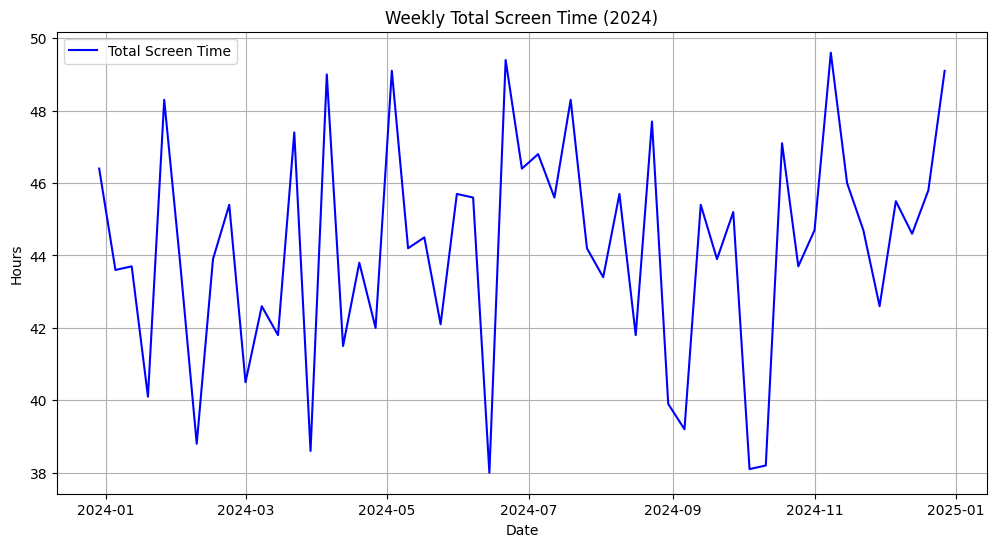

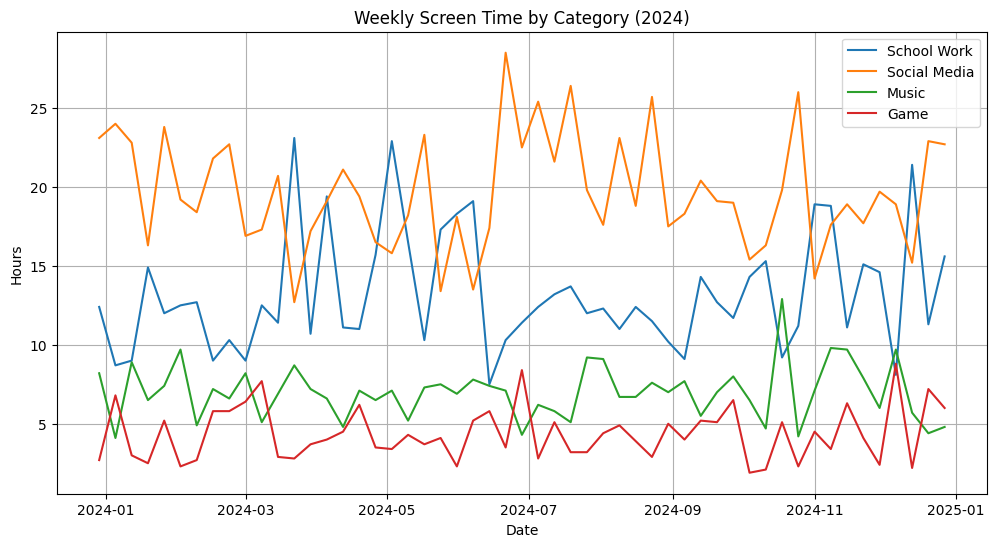

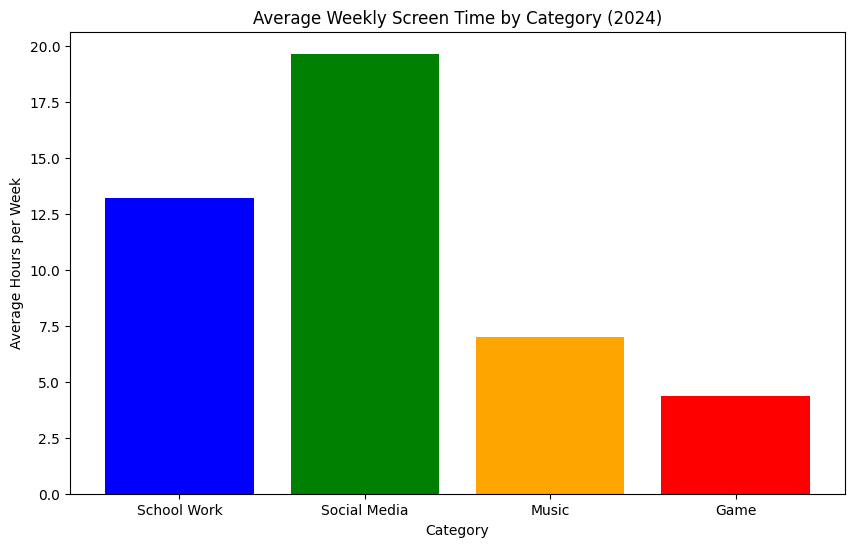

Average Screen Time by Category:
School Work: 13.22 hours per week
Social Media: 19.65 hours per week
Music: 6.98 hours per week
Game: 4.37 hours per week


In [7]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

# Load the screen time data
with open('ScreenTimeData.json', 'r') as f:
    screen_time_data = json.load(f)

# Parse the data and categorize apps
categories = {
    "School Work": ["Google Chrome", "Visual Studio Code", "Microsoft PowerPoint"],
    "Social Media": ["X", "Instagram", "Snapchat", "Whatsapp"],
    "Music": ["Spotify"],
    "Game": ["Brawl Stars"]
}

# Initialize variables
weekly_totals = []
category_totals = defaultdict(list)
dates = []

# Process the data
for entry in screen_time_data:
    week_start = datetime.strptime(entry["week_start_date"], "%Y-%m-%d")
    dates.append(week_start)
    weekly_totals.append(entry["total_hours"])

    # Calculate category totals
    category_sums = {category: 0 for category in categories}
    for app, hours in entry["apps"].items():
        for category, apps in categories.items():
            if app in apps:
                category_sums[category] += hours

    for category, total in category_sums.items():
        category_totals[category].append(total)

# Plot overall screen time
plt.figure(figsize=(12, 6))
plt.plot(dates, weekly_totals, label="Total Screen Time", color='blue')
plt.xlabel("Date")
plt.ylabel("Hours")
plt.title("Weekly Total Screen Time (2024)")
plt.legend()
plt.grid()
plt.show()

# Plot screen time by category
plt.figure(figsize=(12, 6))
for category, totals in category_totals.items():
    plt.plot(dates, totals, label=category)

plt.xlabel("Date")
plt.ylabel("Hours")
plt.title("Weekly Screen Time by Category (2024)")
plt.legend()
plt.grid()
plt.show()

# Calculate averages and visualize
average_category_times = {category: sum(totals) / len(totals) for category, totals in category_totals.items()}

# Plot average weekly screen time by category
plt.figure(figsize=(10, 6))
plt.bar(average_category_times.keys(), average_category_times.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel("Category")
plt.ylabel("Average Hours per Week")
plt.title("Average Weekly Screen Time by Category (2024)")
plt.show()

# Print averages
print("Average Screen Time by Category:")
for category, avg_time in average_category_times.items():
    print(f"{category}: {avg_time:.2f} hours per week")


### **Analyzing Exam Data**

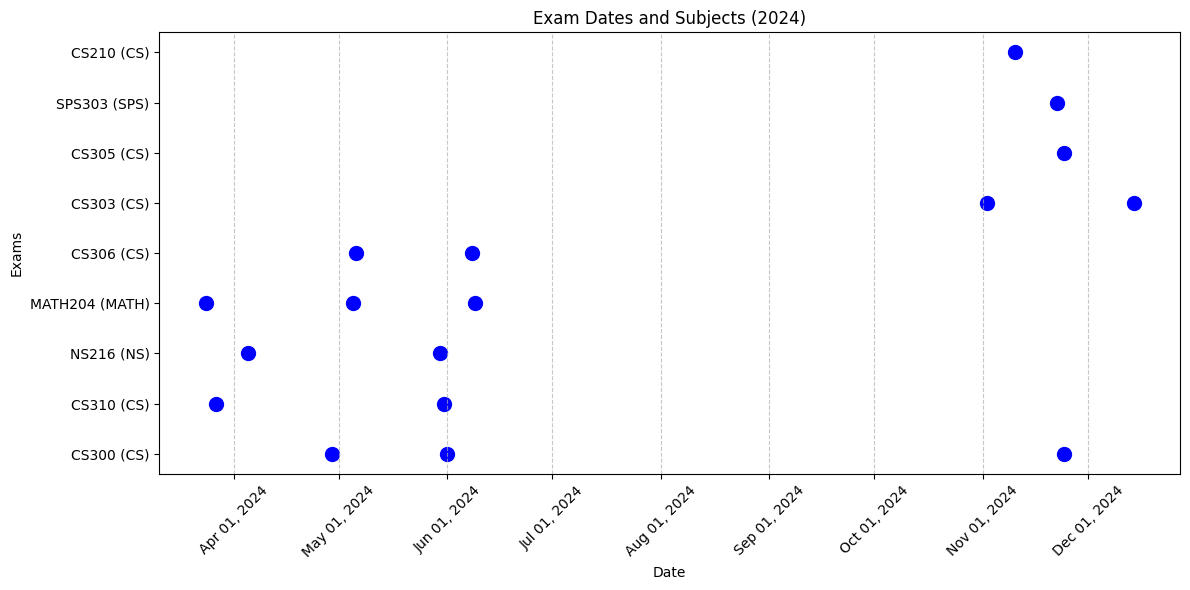

In [10]:
import json
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter

# Load the exam data
with open('/ExamData.json', 'r') as f:
    exam_data = json.load(f)

# Parse the data
exam_dates = []
exam_labels = []

for exam in exam_data:
    exam_date = datetime.strptime(exam["date"], "%Y-%m-%d")
    exam_dates.append(exam_date)
    exam_labels.append(f"{exam['exam_name']} ({exam['subject']})")

# Plot the exam schedule
plt.figure(figsize=(12, 6))
plt.scatter(exam_dates, exam_labels, color="blue", s=100)

# Format the x-axis for better readability
plt.gca().xaxis.set_major_formatter(DateFormatter("%b %d, %Y"))
plt.xticks(rotation=45)

# Add titles and grid
plt.title("Exam Dates and Subjects (2024)")
plt.xlabel("Date")
plt.ylabel("Exams")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


### **Screen Time Comparison: Exam Weeks vs Overall Average**


Average Hours per Category:

During Exam Weeks:
School Work: 19.09 hours
Social Media: 15.80 hours
Music: 7.42 hours
Games: 3.59 hours

Overall Average:
School Work: 13.22 hours
Social Media: 19.65 hours
Music: 6.98 hours
Games: 4.37 hours


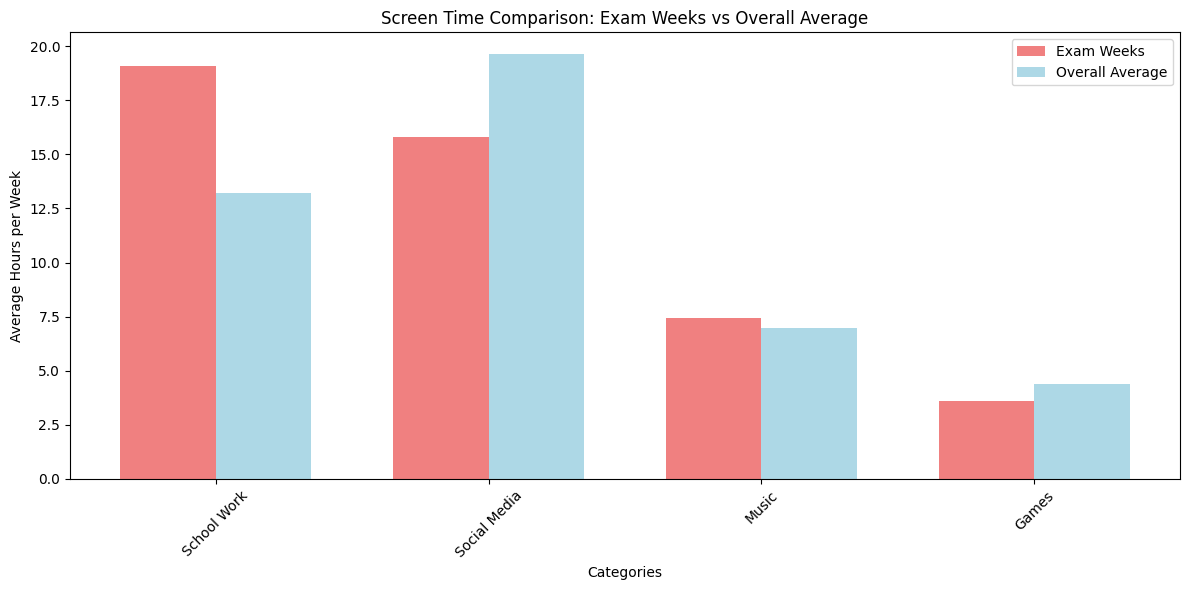

In [13]:
import pandas as pd
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Function to categorize apps
def categorize_apps(apps_dict):
    categories = {
        'School Work': ['Google Chrome', 'Visual Studio Code', 'Microsoft PowerPoint'],
        'Social Media': ['X', 'Instagram', 'Snapchat', 'Whatsapp'],
        'Music': ['Spotify'],
        'Games': ['Brawl Stars']
    }

    categorized = {cat: 0 for cat in categories}
    for app, hours in apps_dict.items():
        for category, app_list in categories.items():
            if app in app_list:
                categorized[category] += hours
    return categorized

# Load and process the data
def process_data(screen_time_data, exam_data):
    # Convert screen time data to DataFrame
    screen_time_records = []
    for week in screen_time_data:
        week_dict = {
            'week_start': datetime.strptime(week['week_start_date'], '%Y-%m-%d'),
            'week_end': datetime.strptime(week['week_end_date'], '%Y-%m-%d'),
        }
        categorized = categorize_apps(week['apps'])
        week_dict.update(categorized)
        screen_time_records.append(week_dict)

    screen_time_df = pd.DataFrame(screen_time_records)

    # Convert exam dates to datetime
    exam_df = pd.DataFrame(exam_data)
    exam_df['date'] = pd.to_datetime(exam_df['date'])

    # Mark exam weeks in screen time data
    def is_exam_week(row, exam_dates):
        week_range = pd.date_range(row['week_start'], row['week_end'])
        return any(exam_date in week_range for exam_date in exam_dates)

    screen_time_df['is_exam_week'] = screen_time_df.apply(
        lambda row: is_exam_week(row, exam_df['date']), axis=1
    )

    return screen_time_df

def analyze_and_visualize(df):
    categories = ['School Work', 'Social Media', 'Music', 'Games']

    # Calculate averages
    exam_weeks_avg = df[df['is_exam_week']][categories].mean()
    overall_avg = df[categories].mean()

    # Print results
    print("\nAverage Hours per Category:")
    print("\nDuring Exam Weeks:")
    for cat, avg in exam_weeks_avg.items():
        print(f"{cat}: {avg:.2f} hours")

    print("\nOverall Average:")
    for cat, avg in overall_avg.items():
        print(f"{cat}: {avg:.2f} hours")

    # Create visualization
    plt.figure(figsize=(12, 6))
    x = range(len(categories))
    width = 0.35

    plt.bar([i - width/2 for i in x], exam_weeks_avg, width, label='Exam Weeks', color='lightcoral')
    plt.bar([i + width/2 for i in x], overall_avg, width, label='Overall Average', color='lightblue')

    plt.xlabel('Categories')
    plt.ylabel('Average Hours per Week')
    plt.title('Screen Time Comparison: Exam Weeks vs Overall Average')
    plt.xticks(x, categories, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Read JSON files
    with open('/ScreenTimeData.json', 'r') as f:
        screen_time_data = json.load(f)

    with open('/ExamData.json', 'r') as f:
        exam_data = json.load(f)

    # Process and analyze the data
    df = process_data(screen_time_data, exam_data)
    analyze_and_visualize(df)

### **Screen Time Comparison: Summer Term vs Overall Average**


Average Hours per Category:

During Summer Term (June 10 - September 8, 2024):
School Work: 11.49 hours
Social Media: 22.03 hours
Music: 6.85 hours
Games: 4.42 hours

Overall Average:
School Work: 13.22 hours
Social Media: 19.65 hours
Music: 6.98 hours
Games: 4.37 hours


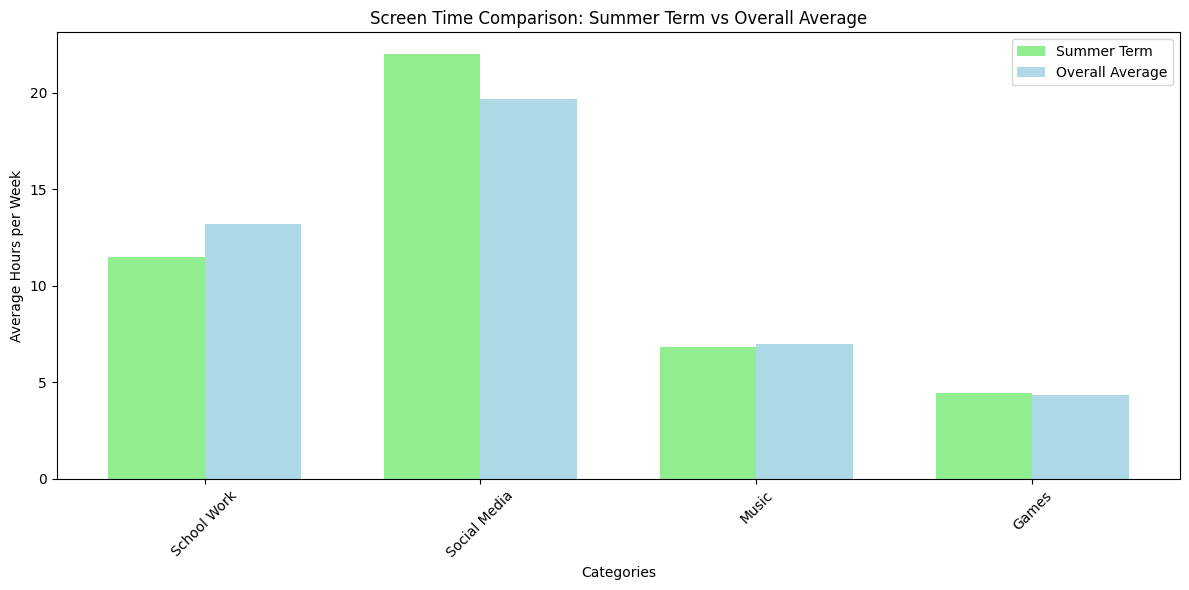

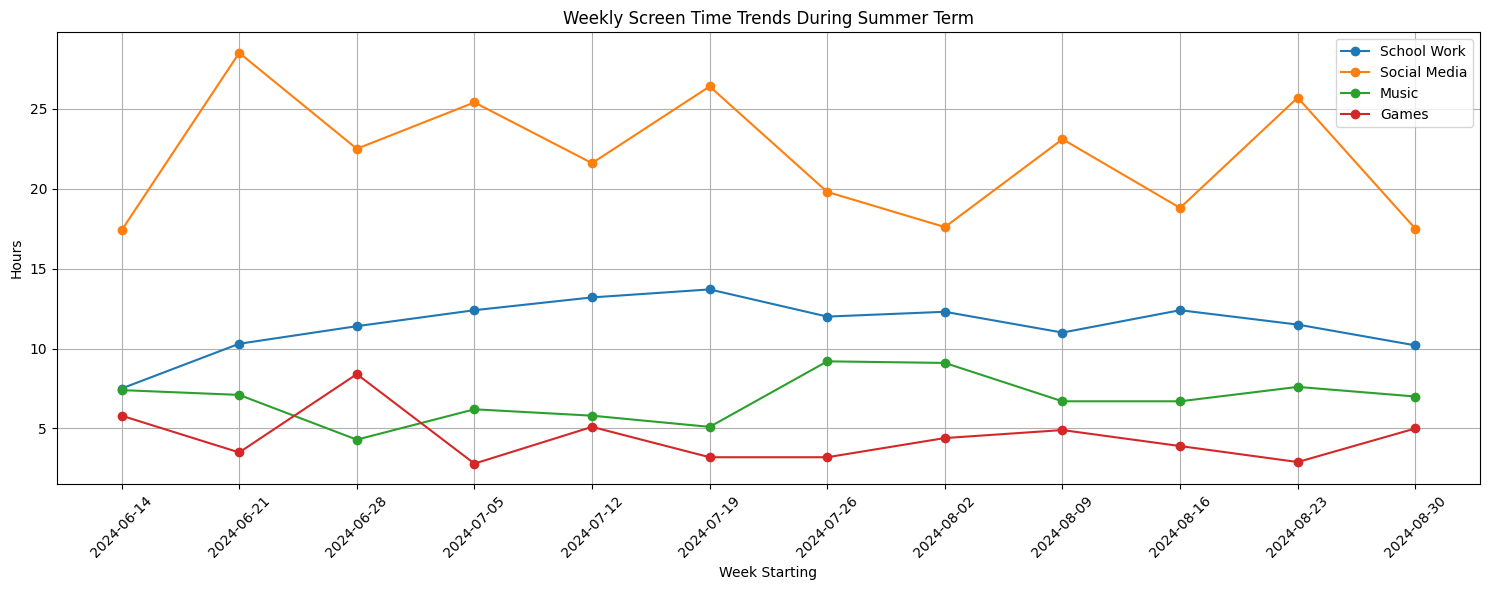

In [14]:
import pandas as pd
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Function to categorize apps
def categorize_apps(apps_dict):
    categories = {
        'School Work': ['Google Chrome', 'Visual Studio Code', 'Microsoft PowerPoint'],
        'Social Media': ['X', 'Instagram', 'Snapchat', 'Whatsapp'],
        'Music': ['Spotify'],
        'Games': ['Brawl Stars']
    }

    categorized = {cat: 0 for cat in categories}
    for app, hours in apps_dict.items():
        for category, app_list in categories.items():
            if app in app_list:
                categorized[category] += hours
    return categorized

# Load and process the data
def process_data(screen_time_data):
    # Convert screen time data to DataFrame
    screen_time_records = []
    for week in screen_time_data:
        week_dict = {
            'week_start': datetime.strptime(week['week_start_date'], '%Y-%m-%d'),
            'week_end': datetime.strptime(week['week_end_date'], '%Y-%m-%d'),
        }
        categorized = categorize_apps(week['apps'])
        week_dict.update(categorized)
        screen_time_records.append(week_dict)

    screen_time_df = pd.DataFrame(screen_time_records)

    # Mark summer term weeks
    summer_start = datetime(2024, 6, 10)
    summer_end = datetime(2024, 9, 8)

    screen_time_df['is_summer'] = screen_time_df.apply(
        lambda row: (row['week_start'] >= summer_start) and (row['week_end'] <= summer_end),
        axis=1
    )

    return screen_time_df

def analyze_and_visualize(df):
    categories = ['School Work', 'Social Media', 'Music', 'Games']

    # Calculate averages
    summer_avg = df[df['is_summer']][categories].mean()
    overall_avg = df[categories].mean()

    # Print results
    print("\nAverage Hours per Category:")
    print("\nDuring Summer Term (June 10 - September 8, 2024):")
    for cat, avg in summer_avg.items():
        print(f"{cat}: {avg:.2f} hours")

    print("\nOverall Average:")
    for cat, avg in overall_avg.items():
        print(f"{cat}: {avg:.2f} hours")

    # Create visualization
    plt.figure(figsize=(12, 6))
    x = range(len(categories))
    width = 0.35

    plt.bar([i - width/2 for i in x], summer_avg, width, label='Summer Term', color='lightgreen')
    plt.bar([i + width/2 for i in x], overall_avg, width, label='Overall Average', color='lightblue')

    plt.xlabel('Categories')
    plt.ylabel('Average Hours per Week')
    plt.title('Screen Time Comparison: Summer Term vs Overall Average')
    plt.xticks(x, categories, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Create a weekly trend visualization for the summer term
    summer_weeks = df[df['is_summer']].copy()
    summer_weeks['week_start_str'] = summer_weeks['week_start'].dt.strftime('%Y-%m-%d')

    plt.figure(figsize=(15, 6))
    for category in categories:
        plt.plot(summer_weeks['week_start_str'], summer_weeks[category],
                marker='o', label=category)

    plt.xlabel('Week Starting')
    plt.ylabel('Hours')
    plt.title('Weekly Screen Time Trends During Summer Term')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Read JSON files
    with open('/ScreenTimeData.json', 'r') as f:
        screen_time_data = json.load(f)

    # Process and analyze the data
    df = process_data(screen_time_data)
    analyze_and_visualize(df)

### **Final Comparisons of the Usages of Categories**


Percentage Changes in Usage:

1. Exam Weeks compared to School Term:
School Work: +39.1%
Social Media: -16.7%
Music: +5.6%
Games: -17.6%

2. Summer compared to School Term:
School Work: -16.2%
Social Media: +16.2%
Music: -2.5%
Games: +1.6%


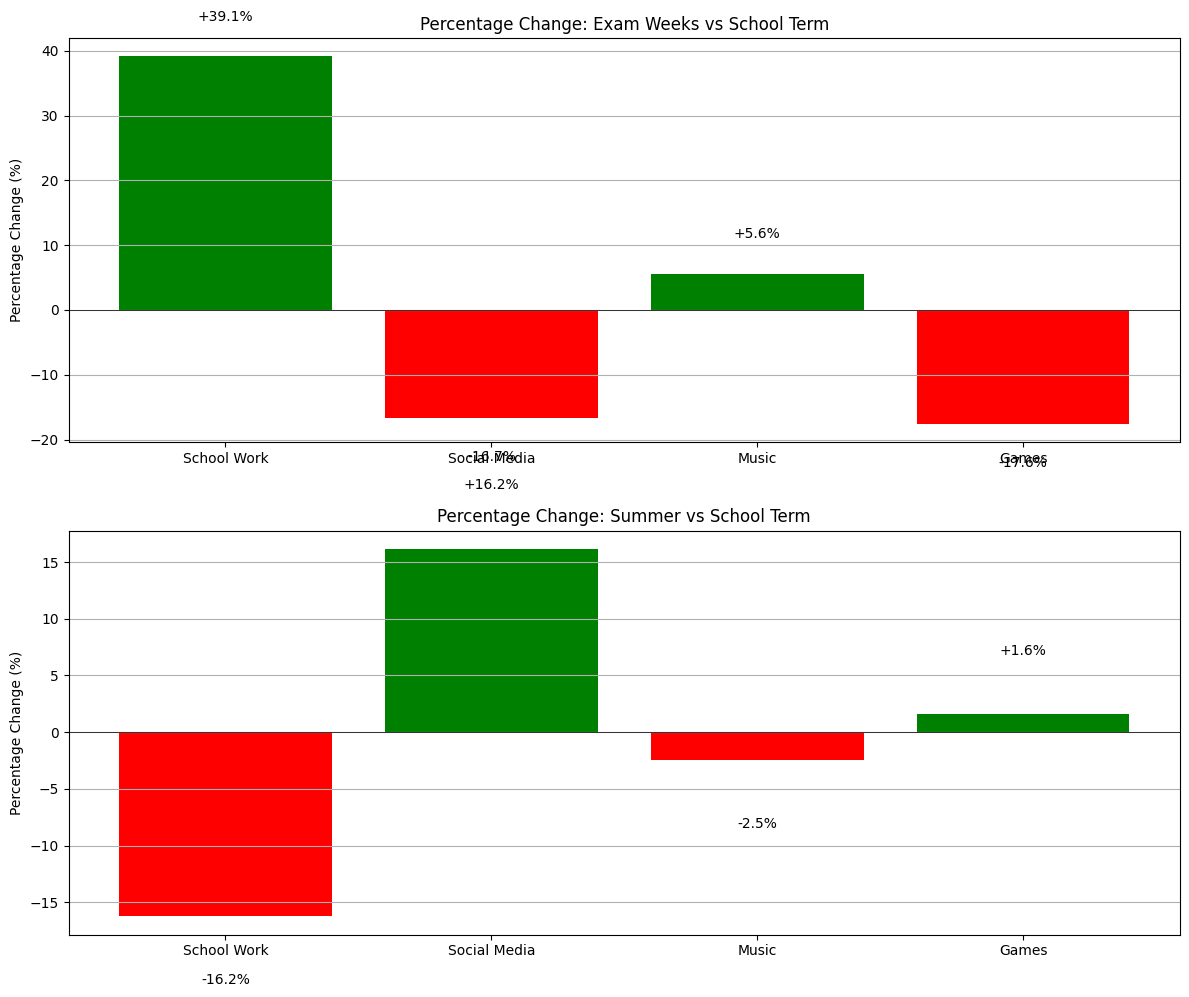

In [15]:
import pandas as pd
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

def categorize_apps(apps_dict):
    categories = {
        'School Work': ['Google Chrome', 'Visual Studio Code', 'Microsoft PowerPoint'],
        'Social Media': ['X', 'Instagram', 'Snapchat', 'Whatsapp'],
        'Music': ['Spotify'],
        'Games': ['Brawl Stars']
    }

    categorized = {cat: 0 for cat in categories}
    for app, hours in apps_dict.items():
        for category, app_list in categories.items():
            if app in app_list:
                categorized[category] += hours
    return categorized

def process_data(screen_time_data, exam_data):
    # Convert screen time data to DataFrame
    screen_time_records = []
    for week in screen_time_data:
        week_dict = {
            'week_start': datetime.strptime(week['week_start_date'], '%Y-%m-%d'),
            'week_end': datetime.strptime(week['week_end_date'], '%Y-%m-%d'),
        }
        categorized = categorize_apps(week['apps'])
        week_dict.update(categorized)
        screen_time_records.append(week_dict)

    df = pd.DataFrame(screen_time_records)

    # Mark summer term weeks
    summer_start = datetime(2024, 6, 10)
    summer_end = datetime(2024, 9, 8)
    df['is_summer'] = df.apply(
        lambda row: (row['week_start'] >= summer_start) and (row['week_end'] <= summer_end),
        axis=1
    )

    # Mark exam weeks
    exam_df = pd.DataFrame(exam_data)
    exam_df['date'] = pd.to_datetime(exam_df['date'])
    df['is_exam_week'] = df.apply(
        lambda row: any(exam_date in pd.date_range(row['week_start'], row['week_end'])
                       for exam_date in exam_df['date']),
        axis=1
    )

    # Mark school term (non-summer weeks)
    df['is_school_term'] = ~df['is_summer']

    return df

def calculate_percentage_changes(df):
    categories = ['School Work', 'Social Media', 'Music', 'Games']

    # Calculate averages for different periods
    school_term_avg = df[df['is_school_term']][categories].mean()
    exam_weeks_avg = df[df['is_exam_week']][categories].mean()
    summer_avg = df[df['is_summer']][categories].mean()

    # Calculate percentage changes
    exam_vs_school = ((exam_weeks_avg - school_term_avg) / school_term_avg * 100).round(2)
    summer_vs_school = ((summer_avg - school_term_avg) / school_term_avg * 100).round(2)

    return exam_vs_school, summer_vs_school

def visualize_percentage_changes(exam_changes, summer_changes):
    categories = ['School Work', 'Social Media', 'Music', 'Games']

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: Exam weeks vs School Term
    colors1 = ['green' if x >= 0 else 'red' for x in exam_changes]
    ax1.bar(categories, exam_changes, color=colors1)
    ax1.set_title('Percentage Change: Exam Weeks vs School Term')
    ax1.set_ylabel('Percentage Change (%)')
    ax1.grid(True, axis='y')
    ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

    # Add percentage labels on bars
    for i, v in enumerate(exam_changes):
        ax1.text(i, v + (5 if v >= 0 else -5), f'{v:+.1f}%',
                ha='center', va='bottom' if v >= 0 else 'top')

    # Plot 2: Summer vs School Term
    colors2 = ['green' if x >= 0 else 'red' for x in summer_changes]
    ax2.bar(categories, summer_changes, color=colors2)
    ax2.set_title('Percentage Change: Summer vs School Term')
    ax2.set_ylabel('Percentage Change (%)')
    ax2.grid(True, axis='y')
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

    # Add percentage labels on bars
    for i, v in enumerate(summer_changes):
        ax2.text(i, v + (5 if v >= 0 else -5), f'{v:+.1f}%',
                ha='center', va='bottom' if v >= 0 else 'top')

    plt.tight_layout()
    plt.show()

def print_percentage_changes(exam_changes, summer_changes):
    categories = ['School Work', 'Social Media', 'Music', 'Games']

    print("\nPercentage Changes in Usage:")
    print("\n1. Exam Weeks compared to School Term:")
    for cat, change in zip(categories, exam_changes):
        print(f"{cat}: {change:+.1f}%")

    print("\n2. Summer compared to School Term:")
    for cat, change in zip(categories, summer_changes):
        print(f"{cat}: {change:+.1f}%")

# Main execution
if __name__ == "__main__":
    # Read JSON files
    with open('/ScreenTimeData.json', 'r') as f:
        screen_time_data = json.load(f)

    with open('/ExamData.json', 'r') as f:
        exam_data = json.load(f)

    # Process data and calculate changes
    df = process_data(screen_time_data, exam_data)
    exam_changes, summer_changes = calculate_percentage_changes(df)

    # Print and visualize results
    print_percentage_changes(exam_changes, summer_changes)
    visualize_percentage_changes(exam_changes, summer_changes)